<a href="https://colab.research.google.com/github/RGanesh2703/Artificial-Neural-Network-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fp = pd.read_csv('Churn_Modelling.csv')
X = fp.iloc[:,3:13]
Y = fp.iloc[:,13]

In [ ]:
geo = pd.get_dummies(X["Geography"],drop_first=True)
gen = pd.get_dummies(X["Gender"],drop_first=True)

In [ ]:
X = pd.concat([X,geo,gen],axis=1)

In [ ]:
X = X.drop(["Geography","Gender"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim = 11))
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6300 - accuracy: 0.6680 - val_loss: 0.5140 - val_accuracy: 0.7989
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.8016 - val_loss: 0.4611 - val_accuracy: 0.8058
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.8166 - val_loss: 0.4350 - val_accuracy: 0.8171
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8285 - val_loss: 0.4138 - val_accuracy: 0.8236
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8378 - val_loss: 0.3975 - val_accuracy: 0.8334
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8438 - val_loss: 0.3894 - val_accuracy: 0.8353
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3647 - accuracy: 0.8453 - val_loss: 0.3836 - val_accuracy: 0.8391

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


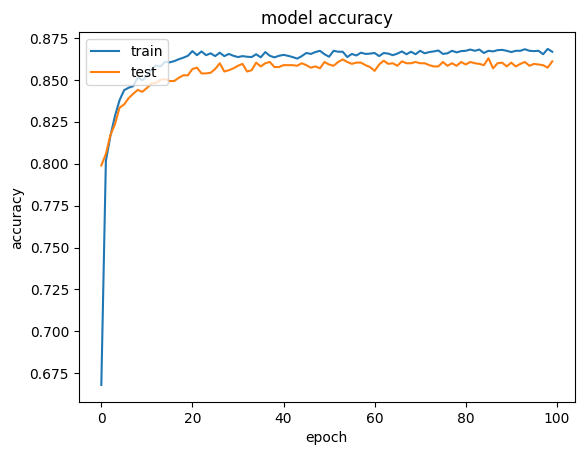

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

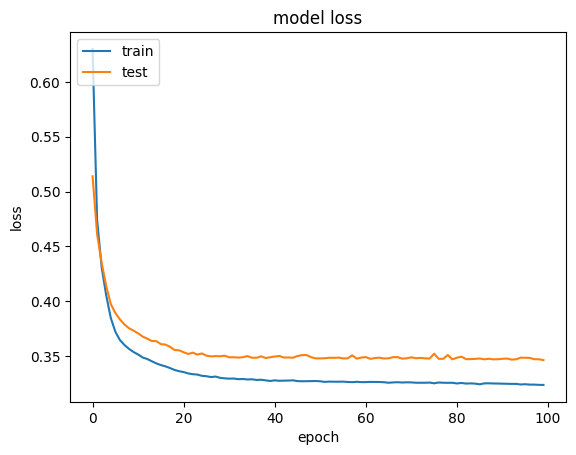

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
print(score)

0.8585
